In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

shape of the image: (128, 128)


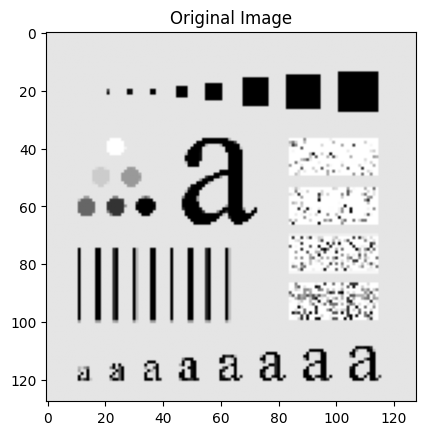

min pixel intensity: 0
max pixel intensity: 255


In [3]:
original_image= cv2.imread('./images/Characters_Test_Pattern.tif',0)
original_image = cv2.resize(original_image, (128,128))
print(f'shape of the image: {original_image.shape}')
plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

$$
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot \exp\left(-j 2 \pi \left( \frac{ux}{M} + \frac{vy}{N} \right)\right)
$$

In [4]:
def dft_2d(image):
    M, N = image.shape
    dft_result = np.zeros((M, N), dtype=complex)
    
    for u in range(M):
        for v in range(N):
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    sum_val += image[x, y] * np.exp(-2j * np.pi * ((u * x / M) + (v * y / N)))
            dft_result[u, v] = sum_val
    
    return dft_result

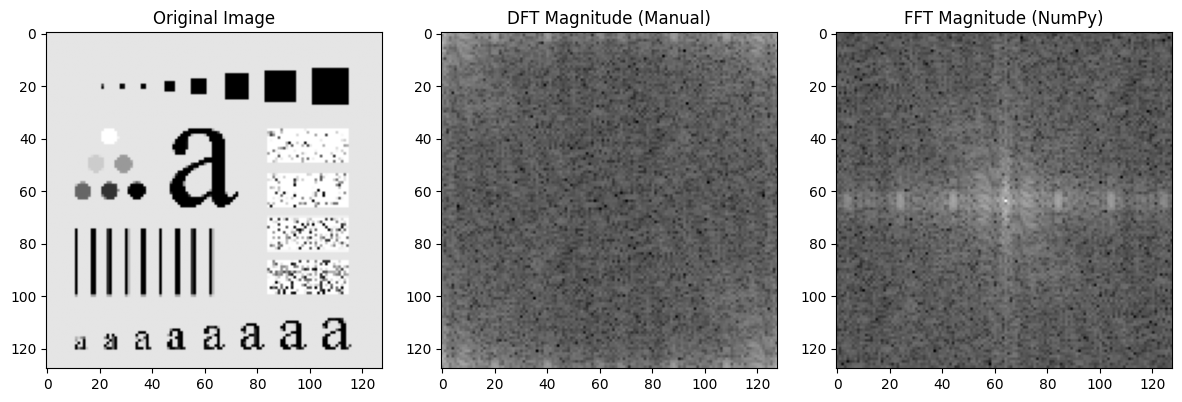

In [5]:
dft_image = dft_2d(original_image)
dft_magnitude = np.log(np.abs(dft_image) + 1)


# Compute 2D FFT using NumPy
fft_image = np.fft.fft2(original_image)
fft_shifted = np.fft.fftshift(fft_image)
fft_magnitude = np.log(np.abs(fft_shifted) + 1)


# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(1,3,2)
plt.title("DFT Magnitude (Manual)")
plt.imshow(dft_magnitude, cmap='gray')

plt.subplot(1,3,3)
plt.title("FFT Magnitude (NumPy)")
plt.imshow(fft_magnitude, cmap='gray')

plt.tight_layout()
plt.show()

### Histogram of the spatial domain image 

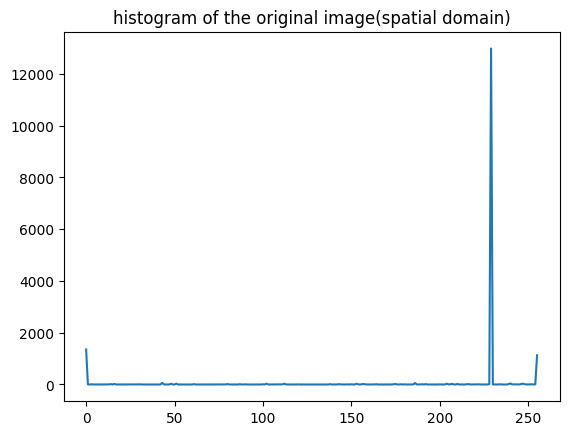

In [19]:
def imhist(image):
    hist = np.zeros(256)
    for i in range(256):
        hist[i] = sum(sum(image == i))
        
    return hist  

hist_original_image = imhist(original_image)
plt.plot(range(256), hist_original_image)
plt.title('histogram of the original image(spatial domain)')
plt.show()  

### Histogram of the frequecncy domain image(dft)

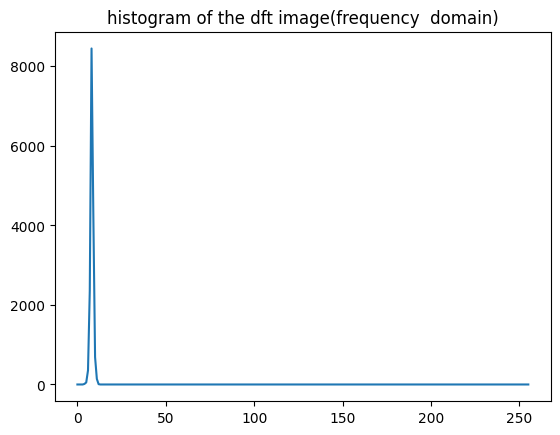

In [18]:
def imhist(image):
    hist = np.zeros(256)
    for i in range(256):
        hist[i] = sum(sum(image == i))
        
    return hist  

dft_magnitude_image = imhist(np.round(dft_magnitude))
plt.plot(range(256), dft_magnitude_image)
plt.title('histogram of the dft image(frequency  domain)')
plt.show()  

### histogram of the frequency domain image(fft)

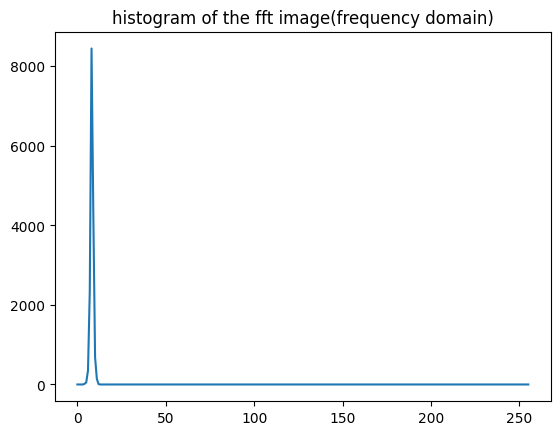

In [20]:
def imhist(image):
    hist = np.zeros(256)
    for i in range(256):
        hist[i] = sum(sum(image == i))
    return hist

fft_magnitude_image = imhist(np.round(fft_magnitude))
plt.plot(range(256), fft_magnitude_image)
plt.title("histogram of the fft image(frequency domain)")
plt.show()
           